In [3]:
!pip install pydantic-settings

In [2]:
# from sentence_transformers import SentenceTransformer;


# SentenceTransformer('unicamp-dl/ptt5-base-portuguese-vocab');
# SentenceTransformer('facebook/m2m100_418M');
# SentenceTransformer('facebook/mbart-large-50');
# SentenceTransformer('pierreguillou/t5-base-qa-squad-v1.1-portuguese');

In [1]:
import os
import traceback
import pyodbc

from loguru import logger

In [6]:
timeout = 60

table_name = f'{os.environ["RAW_DATA_SCHEMA"]}.{os.environ["RAW_DATA_TABLE"]}'

connection_string = 'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'.format(
    server = os.environ["AZURE_SQL_SERVER"],
    database = os.environ["AZURE_SQL_DATABASE"],
    driver = os.environ["AZURE_SQL_DRIVER"],
    username = os.environ["AZURE_SQL_USERNAME"],
    password = os.environ["AZURE_SQL_PASSWORD"],
)


try:
    conn = pyodbc.connect(connection_string, timeout=timeout)
except Exception as err:
    traceback_str = traceback.format_exc()
    logger.error(traceback_str)
    logger.info(f"Exception: {err}")
    logger.info(f"Exception type: {type(err)}")

In [7]:
import pandas as pd

# Substitua a consulta SQL apropriada
sql_query = f'SELECT * FROM {table_name}'

# Executar a consulta SQL e ler os resultados em um DataFrame
df = pd.read_sql(sql_query, conn)

# Fechar a conexão com o banco de dados
conn.close()

df

/tmp/ipykernel_107/1047778581.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


,id,title,author,date,snippet,link,content,thumbnail_link,thumbnail_alt,categories
0,000b577c-3fc6-5889-b0c4-96f88ca370e0,OLIMPÍADAS | Brasil fica em melhor posição da ...,ondapocos,2021-08-08,O Brasil fez história nos Jogos Olímpicos de T...,https://ondapocos.com.br/olimpiadas-brasil-fic...,O Brasil fez história nos Jogos Olímpicos de T...,https://i2.wp.com/ondapocos.com.br/wp-content/...,OLIMPÍADAS | Brasil fica em melhor posição da ...,Destaques|Esporte|Notícias
1,001d0341-89df-5a74-a225-4f2c7b6bcb8e,Sistema para incentivar participação de mulher...,Aline Rodrigues,2022-09-21,"Foi aprovada em Poços de Caldas, a Lei nº 9.63...",https://ondapocos.com.br/sistema-para-incentiv...,"Foi aprovada em Poços de Caldas, a Lei nº 9.63...",https://i1.wp.com/ondapocos.com.br/wp-content/...,Sistema para incentivar participação de mulher...,Destaques|Geral|Notícias
2,001d0360-d034-5959-9db5-84a3da76cd8a,VARGEM GRANDE DO SUL | Estelionatário é preso ...,ondapocos,2021-06-02,"Após uma minuciosa investigação, a Polícia Civ...",https://ondapocos.com.br/vargem-grande-do-sul-...,"Após uma minuciosa investigação, a Polícia Civ...",https://i0.wp.com/ondapocos.com.br/wp-content/...,,Notícias|Policial
3,001e56d1-77b5-5b8f-ab05-7858abb40730,"Em aglomeração no Cristo, jovem é preso por de...",ondapocos,2021-04-12,Durante a fiscalização realizada pela Prefeitu...,https://ondapocos.com.br/em-aglomeracao-no-cri...,Durante a fiscalização realizada pela Prefeitu...,https://i1.wp.com/ondapocos.com.br/wp-content/...,"Em aglomeração no Cristo, jovem é preso por de...",Notícias|Policial
4,00271e31-76c3-575a-86a2-f89b59f5f805,Vídeo: forte chuva de granizo deixa parte de f...,Matheus Luis,2022-11-26,Uma forte chuva de granizo atingiu uma fazenda...,https://ondapocos.com.br/video-forte-chuva-de-...,Uma forte chuva de granizo atingiu uma fazenda...,https://i0.wp.com/ondapocos.com.br/wp-content/...,Vídeo: forte chuva de granizo deixa parte de f...,Destaques|Notícias
...,...,...,...,...,...,...,...,...,...,...
12537,ffee6b0d-235d-503b-8484-0b5121db29e4,Mulher de 43 anos é presa por maus tratos aos ...,andrevince,2022-02-05,"Uma mulher foi presa na sexta-feira, 04 de fev...",https://ondapocos.com.br/mulher-de-43-anos-e-p...,"Uma mulher foi presa na sexta-feira, 04 de fev...",https://i2.wp.com/ondapocos.com.br/wp-content/...,Mulher de 43 anos é presa por maus tratos aos ...,Destaques|Policial
12538,ffeecff3-cca6-5f7b-90da-524deb811dcb,AGUAÍ | Homem é acusado de tentar estuprar cri...,ondapocos,2021-05-05,A mãe de uma garotinha de 6 anos de idade proc...,https://ondapocos.com.br/aguai-homem-e-acusado...,A mãe de uma garotinha de 6 anos de idade proc...,https://i0.wp.com/ondapocos.com.br/wp-content/...,Motociclista morre em acidente na rodovia Cont...,Geral|Notícias
12539,fff17d63-c914-580b-b508-a9f18a6d3743,Aterro sanitário de Poços de Caldas será desat...,ondapocos,2021-02-10,O aterro sanitário de Poços de Caldas será des...,https://ondapocos.com.br/aterro-sanitario-de-p...,O aterro sanitário de Poços de Caldas será des...,https://i2.wp.com/ondapocos.com.br/wp-content/...,Aterro sanitário de Poços de Caldas será desat...,Geral|Notícias
12540,fffc38d6-a126-57f3-9d04-ccf779bb8820,GUAXUPÉ | Brasília pega fogo e assusta moradores,ondapocos,2021-05-14,De acordo com o corpo de bombeiros uma Brasíli...,https://ondapocos.com.br/guaxupe-brasilia-pega...,De acordo com o corpo de bombeiros uma Brasíli...,https://i1.wp.com/ondapocos.com.br/wp-content/...,GUAXUPÉ | Brasília pega fogo e assusta moradores,Notícias|Policial


# Criar vecstore

In [8]:
import pandas as pd

import sqlite3
import pandas as pd


from langchain.document_loaders import TextLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.schema import Document

In [44]:
df = df.sort_values("date", ascending=False)
df['content'] = df['content'].str.split('Receba as notícias através').str[0]

df = df[df['content'].apply(len)>=250].copy()
df['date'] = df['date'].astype(str)

In [45]:
%%time

metadata = df.drop(columns=["id", "content"]).to_dict(orient="records")
ids = df['id'].to_list()
content = df['content'].to_list()
documents = [Document(page_content=c, metadata=m) for c, m in zip(content, metadata)]

CPU times: user 153 ms, sys: 10.1 ms, total: 163 ms
Wall time: 162 ms


In [11]:
# RUN python -c "from langchain.embeddings import HuggingFaceEmbeddings; embeddings = HuggingFaceEmbeddings(model_name='unicamp-dl/ptt5-base-portuguese-vocab')"
# RUN python -c "from langchain.embeddings import HuggingFaceEmbeddings; embeddings = HuggingFaceEmbeddings(model_name='facebook/m2m100_418M')"
# RUN python -c "from langchain.embeddings import HuggingFaceEmbeddings; embeddings = HuggingFaceEmbeddings(model_name='facebook/mbart-large-50')"
# RUN python -c "from langchain.embeddings import HuggingFaceEmbeddings; embeddings = HuggingFaceEmbeddings(model_name='pierreguillou/t5-base-qa-squad-v1.1-portuguese')"

In [46]:
import os
import chromadb
from chromadb.config import Settings
from tqdm import tqdm

chroma_client = chromadb.HttpClient(host="chroma-server", port = 8000, settings=Settings(allow_reset=True, anonymized_telemetry=False))

chroma_client.list_collections()

[Collection(name=embeddings-unicamp-dl-ptt5-base-portuguese-vocab)]

In [53]:
from langchain.embeddings import HuggingFaceEmbeddings

model_name = "unicamp-dl/ptt5-base-portuguese-vocab"

embeddings = HuggingFaceEmbeddings(model_name=model_name)

document_collection = chroma_client.get_or_create_collection(name=model_name.replace("/","-")

for i, c, m in tqdm(zip(ids, content, metadata), total=len(df)):
    try:
        e = embeddings.embed_query(c)
        document_collection.add(documents=[c], metadatas=[m], ids=[i], embeddings=[e])
    except:
        pass

100%|██████████| 12407/12407 [55:37<00:00,  3.72it/s] 


In [51]:
document_collection.count()

1

In [55]:
%%time
models = ['facebook/m2m100_418M', 'facebook/mbart-large-50', 'pierreguillou/t5-base-qa-squad-v1.1-portuguese']

for model_name in models:
    try:
        embeddings = HuggingFaceEmbeddings(model_name=model_name)
        document_collection = chroma_client.get_or_create_collection(name=model_name.replace("/","-"))
        for i, c, m in tqdm(zip(ids, content, metadata), total=len(df)):
            try:
                e = embeddings.embed_query(c)
                document_collection.add(documents=[c], metadatas=[m], ids=[i], embeddings=[e])
            except:
                pass
    except Exception as err:
        print(err)
        

.gitattributes: 100%|██████████| 690/690 [00:00<00:00, 327kB/s]
README.md: 100%|██████████| 4.60k/4.60k [00:00<00:00, 10.5MB/s]
generation_config.json: 100%|██████████| 233/233 [00:00<00:00, 1.68MB/s]
pytorch_model.bin: 100%|██████████| 1.94G/1.94G [03:51<00:00, 8.37MB/s]
sentencepiece.bpe.model: 100%|██████████| 2.42M/2.42M [00:00<00:00, 8.37MB/s]
special_tokens_map.json: 100%|██████████| 1.14k/1.14k [00:00<00:00, 2.84MB/s]
tokenizer_config.json: 100%|██████████| 272/272 [00:00<00:00, 288kB/s]
vocab.json: 100%|██████████| 3.71M/3.71M [00:00<00:00, 4.79MB/s]
No sentence-transformers model found with name /home/jovyan/.cache/torch/sentence_transformers/facebook_m2m100_418M. Creating a new one with MEAN pooling.
.gitattributes: 100%|██████████| 690/690 [00:00<00:00, 807kB/s]
README.md: 100%|██████████| 4.60k/4.60k [00:00<00:00, 7.02MB/s]
config.json: 100%|██████████| 1.42k/1.42k [00:00<00:00, 9.83MB/s]
generation_config.json: 100%|██████████| 261/261 [00:00<00:00, 273kB/s]
pytorch_model.

CPU times: user 1d 17h 7min 37s, sys: 5min 18s, total: 1d 17h 12min 56s
Wall time: 6h 8min 23s


In [16]:
document_collection = chroma_client.get_or_create_collection(name="embeddings-unicamp-dl-ptt5-base-portuguese-vocab")

# results = document_collection.query(query_texts="Give me some facts about space", n_results=3)

# result_documents = results["documents"][0]
# for doc in result_documents:
#     print(doc)

In [ ]:
document_collection.add(

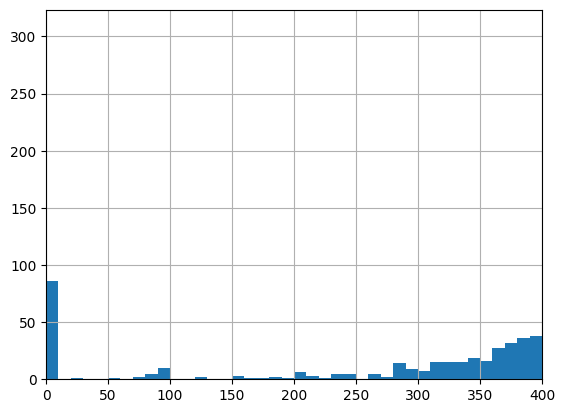

In [32]:
import matplotlib.pyplot as plt

df['content'].apply(len).clip(0,4000).hist(bins=400)

plt.xlim([0,400])

plt.show()